## 키워드 기반의 랭킹 알고리즘 - BM25 
BM25(a.k.a Okapi BM25)는 주어진 쿼리에 대해 문서와의 연관성을 평가하는 랭킹 함수로 사용되는 알고리즘

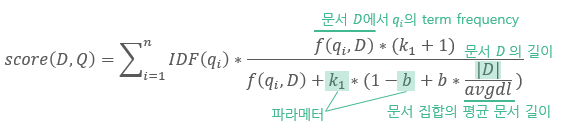

q_i: 쿼리에서 i번째 토큰 (형태소 / bi-gram /BPE 등을 사용할 수 있음)

 

IDF(q_i): 쿼리의 i번째 토큰에 대한 inverse document frequency

자주 등장하는 단어는 penalize 하여 지나치게 높은 가중치를 가지게 되는 것을 방지함.
예를 들어 "the"라는 단어는 영어 문서에서 아주 자주 등장하는 단어이기 때문에 쿼리에 있는 the라는 글자가 문서에 자주 나타났다고 해서 의미 있는 것이 아님.

파이썬에서 BM25 사용하기


In [1]:
!pip install rank_bm25

In [2]:
from rank_bm25 import BM25Okapi

corpus = [
    "세계 배달 피자 리더 도미노피자가 우리 고구마를 활용한 신메뉴를 출시한다.도미노피자는 오는 2월 1일 국내산 고구마와 4가지 치즈가 어우러진 신메뉴 `우리 고구마 피자`를 출시하고 전 매장에서 판매를 시작한다. 이번에 도미노피자가 내놓은 신메뉴 `우리 고구마 피자`는 까다롭게 엄선한 국내산 고구마를 무스와 큐브 형태로 듬뿍 올리고, 모차렐라, 카망베르, 체더 치즈와 리코타 치즈 소스 등 4가지 치즈와 와규 크럼블을 더한 프리미엄 고구마 피자다.",
    "피자의 발상지이자 원조라고 할 수 있는 남부의 나폴리식 피자(Pizza Napolitana)는 재료 본연의 맛에 집중하여 뛰어난 식감을 자랑한다. 대표적인 나폴리 피자로는 피자 마리나라(Pizza Marinara)와 피자 마르게리타(Pizza Margherita)가 있다.",
    "도미노피자가 삼일절을 맞아 '방문포장 1+1' 이벤트를 진행한다. 이번 이벤트는 도미노피자 102개 매장에서 3월 1일 단 하루 동안 방문포장 온라인, 오프라인 주문 시 피자 1판을 더 증정하는 이벤트다. 온라인 주문 시 장바구니에 2판을 담은 후 할인 적용이 가능하며, 동일 가격 또는 낮은 가격의 피자를 고객이 선택하면 무료로 증정한다."
]

def tokenizer(sent):
  return sent.split(" ")

tokenized_corpus = [tokenizer(doc) for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

doc_len : 파싱된 문서의 길이

In [3]:
bm25.doc_len 

[59, 27, 47]

doc_freqs : 문서에 있는 각각의 토큰의 빈도 (각 문서 내에서 딕셔너리 형태로 저장)

In [4]:
bm25.doc_freqs 

[{'1일': 1,
  '2월': 1,
  '4가지': 2,
  '`우리': 2,
  '고구마': 3,
  '고구마를': 2,
  '고구마와': 1,
  '국내산': 2,
  '까다롭게': 1,
  '내놓은': 1,
  '더한': 1,
  '도미노피자가': 2,
  '듬뿍': 1,
  '등': 1,
  '리더': 1,
  '리코타': 1,
  '매장에서': 1,
  '모차렐라,': 1,
  '무스와': 1,
  '배달': 1,
  '세계': 1,
  '소스': 1,
  '시작한다.': 1,
  '신메뉴': 2,
  '신메뉴를': 1,
  '어우러진': 1,
  '엄선한': 1,
  '오는': 1,
  '올리고,': 1,
  '와규': 1,
  '우리': 1,
  '이번에': 1,
  '전': 1,
  '체더': 1,
  '출시하고': 1,
  '출시한다.도미노피자는': 1,
  '치즈': 1,
  '치즈가': 1,
  '치즈와': 2,
  '카망베르,': 1,
  '큐브': 1,
  '크럼블을': 1,
  '판매를': 1,
  '프리미엄': 1,
  '피자': 1,
  '피자`는': 1,
  '피자`를': 1,
  '피자다.': 1,
  '형태로': 1,
  '활용한': 1},
 {'Margherita)가': 1,
  'Marinara)와': 1,
  'Napolitana)는': 1,
  '나폴리': 1,
  '나폴리식': 1,
  '남부의': 1,
  '대표적인': 1,
  '뛰어난': 1,
  '마르게리타(Pizza': 1,
  '마리나라(Pizza': 1,
  '맛에': 1,
  '발상지이자': 1,
  '본연의': 1,
  '수': 1,
  '식감을': 1,
  '원조라고': 1,
  '있는': 1,
  '있다.': 1,
  '자랑한다.': 1,
  '재료': 1,
  '집중하여': 1,
  '피자': 2,
  '피자(Pizza': 1,
  '피자로는': 1,
  '피자의': 1,
  '할': 1},
 {"'방문포장": 1,
  "1+1'": 1,
  

idf : 토큰의 inverse term frequency를 계산해둠(TF IDF의 idf맞음)

In [5]:
bm25.idf

{"'방문포장": 0.5108256237659907,
 "1+1'": 0.5108256237659907,
 '102개': 0.5108256237659907,
 '1일': 0.11580621302033972,
 '1판을': 0.5108256237659907,
 '2월': 0.5108256237659907,
 '2판을': 0.5108256237659907,
 '3월': 0.5108256237659907,
 '4가지': 0.5108256237659907,
 'Margherita)가': 0.5108256237659907,
 'Marinara)와': 0.5108256237659907,
 'Napolitana)는': 0.5108256237659907,
 '`우리': 0.5108256237659907,
 '가격': 0.5108256237659907,
 '가격의': 0.5108256237659907,
 '가능하며,': 0.5108256237659907,
 '고객이': 0.5108256237659907,
 '고구마': 0.5108256237659907,
 '고구마를': 0.5108256237659907,
 '고구마와': 0.5108256237659907,
 '국내산': 0.5108256237659907,
 '까다롭게': 0.5108256237659907,
 '나폴리': 0.5108256237659907,
 '나폴리식': 0.5108256237659907,
 '남부의': 0.5108256237659907,
 '낮은': 0.5108256237659907,
 '내놓은': 0.5108256237659907,
 '단': 0.5108256237659907,
 '담은': 0.5108256237659907,
 '대표적인': 0.5108256237659907,
 '더': 0.5108256237659907,
 '더한': 0.5108256237659907,
 '도미노피자': 0.5108256237659907,
 '도미노피자가': 0.11580621302033972,
 '동안': 0.5108256

이제 쿼리가 들어오면 토큰화를 진행하고 bm25 클래스의 get_scores 메서드를 통해 문서 점수를 받아올 수 있다.

In [6]:
query = "도미노피자 신메뉴"
tokenized_query = tokenizer(query)

doc_scores = bm25.get_scores(tokenized_query)
doc_scores

array([0.65960979, 0.        , 0.49736316])

get_top_n 메서드는 점수에 따른 상위 n개의 문서를 바로 리턴해주기 때문에 유용하게 활용할 수 있다.

In [7]:
bm25.get_top_n(tokenized_query, corpus, n=1)

['세계 배달 피자 리더 도미노피자가 우리 고구마를 활용한 신메뉴를 출시한다.도미노피자는 오는 2월 1일 국내산 고구마와 4가지 치즈가 어우러진 신메뉴 `우리 고구마 피자`를 출시하고 전 매장에서 판매를 시작한다. 이번에 도미노피자가 내놓은 신메뉴 `우리 고구마 피자`는 까다롭게 엄선한 국내산 고구마를 무스와 큐브 형태로 듬뿍 올리고, 모차렐라, 카망베르, 체더 치즈와 리코타 치즈 소스 등 4가지 치즈와 와규 크럼블을 더한 프리미엄 고구마 피자다.']